In [1]:
!pip install -U nilearn

    100% |████████████████████████████████| 983kB 9.6MB/s 
    100% |████████████████████████████████| 4.2MB 6.2MB/s 
  Running setup.py bdist_wheel for nibabel ... - \ | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/7e/97/9b/7cf05225afac39de2dacef758fc06c0c0bdf3e6efb40fabb9c
Successfully built nibabel


In [2]:
import warnings

import numpy as np
from scipy import stats
from sklearn.decomposition import FastICA

from nilearn import datasets
from nilearn.image import smooth_img

from nilearn.datasets import load_mni152_brain_mask
from nilearn.input_data import NiftiMasker

from nilearn import plotting

from nilearn.datasets import fetch_neurovault
from nilearn.datasets.neurovault import basic_collection_terms, NotNull

/usr/local/lib/python3.6/dist-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 87, in catch_config_e

In [3]:
print("Fetching Neurovault images; "
      "if you haven't downloaded any Neurovault data before "
      "this will take several minutes.")
nv_data = fetch_neurovault(max_images=250, collection_terms=dict(basic_collection_terms(), DOI=NotNull()), fetch_neurosynth_words=True)

Fetching Neurovault images; if you haven't downloaded any Neurovault data before this will take several minutes.

Dataset created in /content/nilearn_data/neurovault

Reading local neurovault data.
No image found on local disk.
Reading server neurovault data.
Scroll collections: getting new batch: http://neurovault.org/api/collections/?limit=100&offset=0
Scroll collections: batch size: 100
Scroll images from collection 35: getting new batch: http://neurovault.org/api/collections/35/images/?limit=100&offset=0
Scroll images from collection 35: batch size: 4
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_35/image_110.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_35/neurosynth_words_for_image_110.json
Already fetched 1 image
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_35/image_111.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_35/neurosynth_words

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/neurosynth_words_for_image_14190.json
Already fetched 14 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14191.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/neurosynth_words_for_image_14191.json
Already fetched 15 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14192.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/neurosynth_words_for_image_14192.json
Already fetched 16 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14193.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/neurosynth_words_for_image_14193.json
Already fetched 17 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14194.nii

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14206.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/neurosynth_words_for_image_14206.json
Already fetched 30 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14207.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/neurosynth_words_for_image_14207.json
Already fetched 31 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14208.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/neurosynth_words_for_image_14208.json
Already fetched 32 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/image_14209.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1054/neurosynth_words_for_image_14209.json
Already fetched 33 ima

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1194/image_16252.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1194/neurosynth_words_for_image_16252.json
Already fetched 45 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1194/image_16253.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1194/neurosynth_words_for_image_16253.json
Already fetched 46 images
On neurovault.org: 2 images matched query in collection 1194
Scroll images from collection 1056: getting new batch: http://neurovault.org/api/collections/1056/images/?limit=100&offset=0
Scroll images from collection 1056: batch size: 20
On neurovault.org: no image matched query in collection 1056
Scroll images from collection 1039: getting new batch: http://neurovault.org/api/collections/1039/images/?limit=100&offset=0
Scroll images from collection 1039: batch size: 41
Download succeeded, down

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14096.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/neurosynth_words_for_image_14096.json
Already fetched 59 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14097.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/neurosynth_words_for_image_14097.json
Already fetched 60 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14098.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/neurosynth_words_for_image_14098.json
Already fetched 61 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14099.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/neurosynth_words_for_image_14099.json
Already fetched 62 ima

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/neurosynth_words_for_image_14113.json
Already fetched 74 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14114.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/neurosynth_words_for_image_14114.json
Already fetched 75 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14115.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/neurosynth_words_for_image_14115.json
Already fetched 76 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14116.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/neurosynth_words_for_image_14116.json
Already fetched 77 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1039/image_14117.nii

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Scroll collections: batch size: 100
Scroll images from collection 1196: getting new batch: http://neurovault.org/api/collections/1196/images/?limit=100&offset=0
Scroll images from collection 1196: batch size: 1
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1196/image_16255.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1196/neurosynth_words_for_image_16255.json
Already fetched 86 images
On neurovault.org: 1 image matched query in collection 1196
Scroll images from collection 786: getting new batch: http://neurovault.org/api/collections/786/images/?limit=100&offset=0
Scroll images from collection 786: batch size: 25
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_786/image_11576.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_786/neurosynth_words_for_image_11576.json
Already fetched 87 images
On neurovault.org: 1 image matched query in collection 7

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9035.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9035.json
Could not fetch words for image 9035
Already fetched 91 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9036.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9036.json
Could not fetch words for image 9036
Already fetched 92 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9037.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9037.json
Could not fetch words for image 9037
Already fetched 93 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9038.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9038.json
Could not fetch words for image 9038
Already fetched 94 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9039.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9039.json
Could not fetch words for image 9039
Already fetched 95 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9040.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9040.json
Could not fetch words for image 9040
Already fetched 96 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9041.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9041.json
Could not fetch words for image 9041
Already fetched 97 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9042.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9042.json
Could not fetch words for image 9042
Already fetched 98 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9043.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9043.json
Could not fetch words for image 9043
Already fetched 99 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9044.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9044.json
Could not fetch words for image 9044
Already fetched 100 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9045.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9045.json
Could not fetch words for image 9045
Already fetched 101 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9046.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9046.json
Could not fetch words for image 9046
Already fetched 102 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9047.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9047.json
Could not fetch words for image 9047
Already fetched 103 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9048.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9048.json
Could not fetch words for image 9048
Already fetched 104 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9049.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9049.json
Could not fetch words for image 9049
Already fetched 105 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9050.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9050.json
Could not fetch words for image 9050
Already fetched 106 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9051.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9051.json
Could not fetch words for image 9051
Already fetched 107 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9052.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9052.json
Could not fetch words for image 9052
Already fetched 108 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/image_9053.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_555/neurosynth_words_for_image_9053.json
Could not fetch words for image 9053
Already fetched 109 images
On neurovault.org: 20 images matched query in collection 555
Scroll images from collection 325: getting new batch: http://neurovault.org/api/collections/325/images/?limit=100&offset=0


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Scroll images from collection 325: batch size: 8
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_325/image_1923.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_325/neurosynth_words_for_image_1923.json
Already fetched 110 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_325/image_1924.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_325/neurosynth_words_for_image_1924.json
Already fetched 111 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_325/image_1925.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_325/neurosynth_words_for_image_1925.json
Already fetched 112 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_325/image_1926.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_325/neurosynth_words_for_im

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_419/image_2743.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_419/neurosynth_words_for_image_2743.json
Already fetched 120 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_419/image_2744.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_419/neurosynth_words_for_image_2744.json
Already fetched 121 images
On neurovault.org: 4 images matched query in collection 419
Scroll images from collection 550: getting new batch: http://neurovault.org/api/collections/550/images/?limit=100&offset=0
Scroll images from collection 550: batch size: 52
On neurovault.org: no image matched query in collection 550
Scroll images from collection 1060: getting new batch: http://neurovault.org/api/collections/1060/images/?limit=100&offset=0
Scroll images from collection 1060: batch size: 1
On neurovault.org: no image matched 

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1035/neurosynth_words_for_image_14045.json
Already fetched 130 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1035/image_14046.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1035/neurosynth_words_for_image_14046.json
Already fetched 131 images
On neurovault.org: 2 images matched query in collection 1035
Scroll images from collection 1276: getting new batch: http://neurovault.org/api/collections/1276/images/?limit=100&offset=0
Scroll images from collection 1276: batch size: 4
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1276/image_18507.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1276/neurosynth_words_for_image_18507.json
Already fetched 132 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1276/image_18508.nii.gz
Download

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1325/image_18894.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1325/neurosynth_words_for_image_18894.json
Could not fetch words for image 18894
Already fetched 139 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1325/image_18895.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1325/neurosynth_words_for_image_18895.json
Could not fetch words for image 18895
Already fetched 140 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1325/image_18898.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1325/neurosynth_words_for_image_18898.json
Could not fetch words for image 18898
Already fetched 141 images


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nilearn/datasets/neurovault.py", line 1577, in _download_image_terms
    assert _check_has_words(image_info['ns_words_absolute_path'])
AssertionError


Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1325/image_18900.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1325/neurosynth_words_for_image_18900.json
Already fetched 142 images
On neurovault.org: 5 images matched query in collection 1325
Scroll images from collection 1683: getting new batch: http://neurovault.org/api/collections/1683/images/?limit=100&offset=0
Scroll images from collection 1683: batch size: 100
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_24918.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_24918.json
Already fetched 143 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25483.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25483.json
Already fetched 144 images
Downlo

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25495.json
Already fetched 156 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25496.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25496.json
Already fetched 157 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25497.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25497.json
Already fetched 158 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25498.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25498.json
Already fetched 159 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25499

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25510.json
Already fetched 171 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25511.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25511.json
Already fetched 172 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25512.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25512.json
Already fetched 173 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25513.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25513.json
Already fetched 174 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25514

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25525.json
Already fetched 186 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25526.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25526.json
Already fetched 187 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25527.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25527.json
Already fetched 188 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25528.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25528.json
Already fetched 189 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25529

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25540.json
Already fetched 201 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25541.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25541.json
Already fetched 202 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25542.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25542.json
Already fetched 203 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25543.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25543.json
Already fetched 204 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25544

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25555.json
Already fetched 216 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25556.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25556.json
Already fetched 217 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25557.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25557.json
Already fetched 218 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25558.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25558.json
Already fetched 219 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25559

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25570.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25570.json
Already fetched 231 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25571.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25571.json
Already fetched 232 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25572.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25572.json
Already fetched 233 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25573.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25573.json
Already fetched 234

Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25585.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25585.json
Already fetched 246 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25586.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25586.json
Already fetched 247 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25587.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25587.json
Already fetched 248 images
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/image_25588.nii.gz
Download succeeded, downloaded to: /content/nilearn_data/neurovault/collection_1683/neurosynth_words_for_image_25588.json
Already fetched 249

In [4]:
images = nv_data['images']
term_weights = nv_data['word_frequencies']
vocabulary = nv_data['vocabulary']

# Clean and report term scores
term_weights[term_weights < 0] = 0
total_scores = np.mean(term_weights, axis=0)

print("\nTop 10 neurosynth terms from downloaded images:\n")

for term_idx in np.argsort(total_scores)[-10:][::-1]:
    print(vocabulary[term_idx])


Top 10 neurosynth terms from downloaded images:

sentences
temporal
sentence
comprehension
language
temporal sulcus
middle temporal
superior temporal
linguistic
temporal gyrus


In [5]:
print("\nReshaping and masking images.\n")

with warnings.catch_warnings():
    warnings.simplefilter('ignore', UserWarning)
    warnings.simplefilter('ignore', DeprecationWarning)

    mask_img = load_mni152_brain_mask()
    masker = NiftiMasker(
        mask_img=mask_img, memory='nilearn_cache', memory_level=1)
    masker = masker.fit()

    # Images may fail to be transformed, and are of different shapes,
    # so we need to transform one-by-one and keep track of failures.
    X = []
    is_usable = np.ones((len(images),), dtype=bool)

    for index, image_path in enumerate(images):
        # load image and remove nan and inf values.
        # applying smooth_img to an image with fwhm=None simply cleans up
        # non-finite values but otherwise doesn't modify the image.
        image = smooth_img(image_path, fwhm=None)
        try:
            X.append(masker.transform(image))
        except Exception as e:
            meta = nv_data['images_meta'][index]
            print("Failed to mask/reshape image: id: {0}; "
                  "name: '{1}'; collection: {2}; error: {3}".format(
                      meta.get('id'), meta.get('name'),
                      meta.get('collection_id'), e))
            is_usable[index] = False

# Now reshape list into 2D matrix, and remove failed images from terms
X = np.vstack(X)
term_weights = term_weights[is_usable, :]


Reshaping and masking images.



In [6]:
!pip install -U umap-learn

Requirement not upgraded as not directly required: scikit-learn>=0.16 in /usr/local/lib/python3.6/dist-packages (from umap-learn) (0.19.1)
Requirement not upgraded as not directly required: scipy>=0.19 in /usr/local/lib/python3.6/dist-packages (from umap-learn) (0.19.1)
    100% |████████████████████████████████| 1.9MB 10.2MB/s 
Requirement not upgraded as not directly required: numpy>=1.8.2 in /usr/local/lib/python3.6/dist-packages (from scipy>=0.19->umap-learn) (1.14.5)
    100% |████████████████████████████████| 15.8MB 3.2MB/s 
  Running setup.py bdist_wheel for umap-learn ... - done
  Stored in directory: /content/.cache/pip/wheels/f3/e1/4b/1f9a0c2f9b82523b261c36c6ce9a4d1524582e03ebbf6852d6
Successfully built umap-learn


In [0]:
import umap

In [0]:
embedding = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(X)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

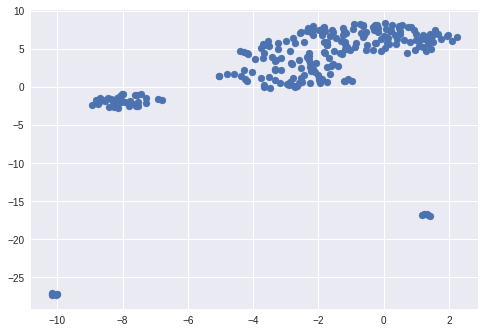

In [10]:
plt.scatter(embedding[:,0], embedding[:,1])

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(embedding)

In [0]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = embedding[:, 0].min() - 1, embedding[:, 0].max() + 1
y_min, y_max = embedding[:, 1].min() - 1, embedding[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [0]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

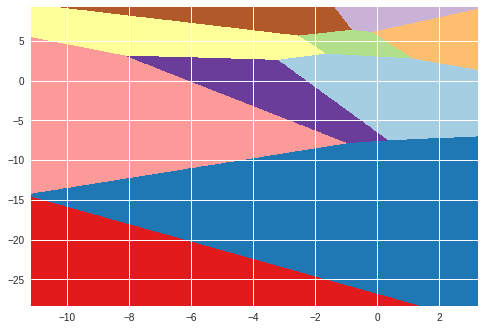

In [15]:
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

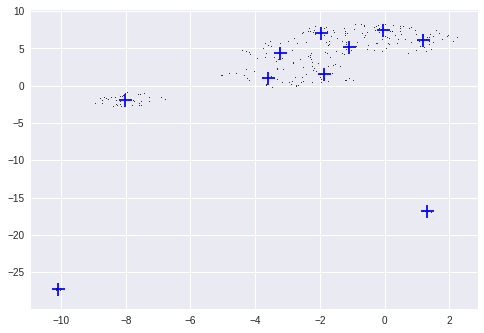

In [20]:
plt.plot(embedding[:, 0], embedding[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=169, linewidths=3,
            color='b', zorder=10)